## Обработка речевого канала

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
from IPython.display import Video
from pipeline import sound_markers

In [3]:
info_path = '/home/lameus/Projects/agression/game_rosenzweig/garsan5401@yandex.ru_1/rosenzweig.csv'
video_path = '/home/lameus/Projects/agression/game_rosenzweig/garsan5401@yandex.ru_1/rosenzweig.mp4'

In [7]:
Video(video_path)

Получение интересующих временных интервалов

In [8]:
info_file = pd.read_csv(info_path)
timestamps = []
for n in range(0,info_file.shape[0]-1,2):
    slice = p=info_file.iloc[n:n+2]
    timestamps.append([(slice.screen[n], slice.video_time[n]), (slice.screen[n+1], slice.video_time[n+1])])

Полученный список содержит информацию о том, когда начинается и заканчивается интересующий интервал, а так же, что на нем в данный момент содержится

In [9]:
timestamps

[[('image_3', 224), ('image_3', 238)],
 [('image_2', 238), ('image_2', 253)],
 [('image_1', 253), ('image_1', 267)],
 [('image_4', 267), ('image_4', 273)],
 [('image_7', 363), ('image_7', 377)],
 [('image_6', 377), ('image_6', 398)],
 [('image_8', 398), ('image_8', 422)],
 [('image_5', 422), ('image_5', 424)]]

Выделение маркеров агрессивности

In [10]:
markers = []

In [11]:
markers.append(sound_markers(video_path, timestamps=timestamps, name=video_path, annotation=True))

Громкость была резко повышена на: 231.152 секунде
Темп речи: 129.2
Громкость была резко повышена на: 386.845 секунде
Темп речи: 126.0
Громкость была резко повышена на: 387.82 секунде
Темп речи: 126.0
Громкость была резко повышена на: 392.581 секунде
Темп речи: 126.0


In [16]:
def visualize_emos(markers, num_emos=7):
    emos = []
    for key in markers.keys():
        emos.append(markers[key]['emotions'])
    emos = np.array(emos)
    vals = {'angry':emos[:,0], 'disgust':emos[:,1], 'fear':emos[:,2], 'happy': emos[:,3], 
    'sad':emos[:,4], 'surprise':emos[:,5], 'neutral':emos[:,6]}
    report = pd.DataFrame(vals)

    sns.set_theme(style="whitegrid")
    figure, ax = pylab.subplots(1, 1, figsize=(20, 10))

    pylab.title('График эмоционального состояния')
    sns.lineplot(data=report[['angry','disgust','fear', 'happy', 'sad', 'surprise', 'neutral']], linewidth=3, marker='o')
    pylab.xlim(0, len(markers)-1)
    pylab.show()

*Визуализация графика эмоционального состояния*

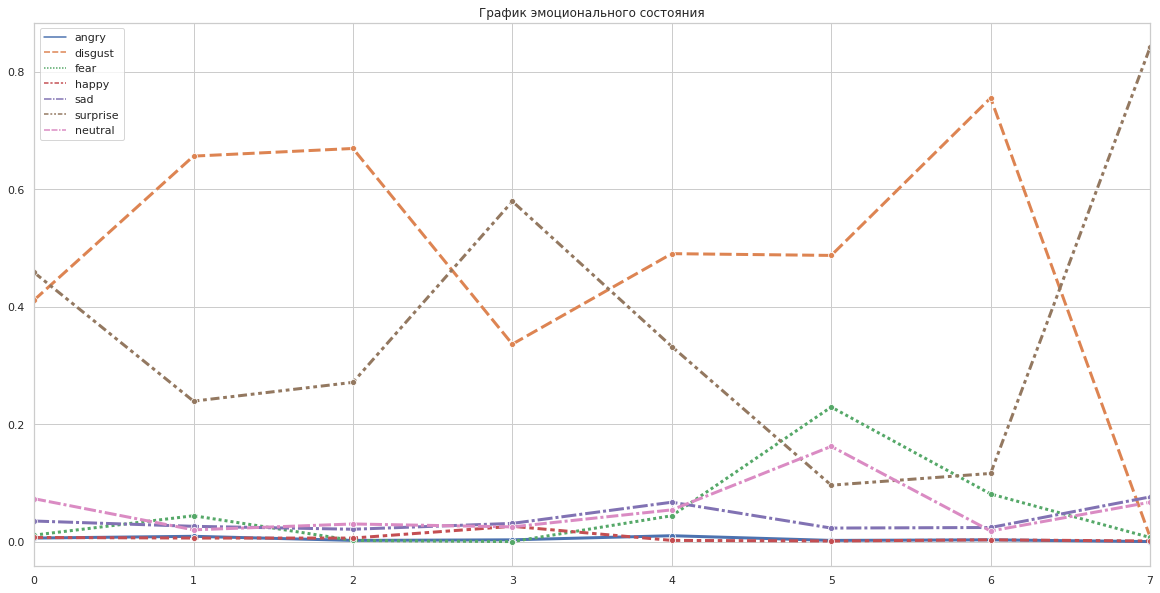

In [17]:
visualize_emos(markers[0])

### Транскрибация речи 

In [2]:
from py import process
import stt
import sys
import os
import subprocess
import re
import torch



Using cache found in /home/lameus/.cache/torch/hub/snakers4_silero-models_master


In [4]:
raw = stt.get_raw(video_path)
stt.processing(raw)

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/lameus/vosk-api/python/example/model/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/lameus/vosk-api/python/example/model/graph/HCLr.fst /home/lameus/vosk-api/python/example/model/graph/Gr.fst
LOG (VoskAPI:ReadDataFiles():model.cc:303) Loading winfo /home/lameus/vosk-api/python/example/model/graph/phones/word_boundary.int


'Ой, извини, пожалуйста. Я могу заплатить за него, с чего ты взял что я вру извините пожалуйста. Я не хотел испортить вашей машины. Давайте Джейн Гаи. Ну в таком случае всего хорошо. Ну вообще честно, говоря мне неприятно слышать. Я бы не хотел, чтобы вышли в кино. Давайте попробуем ещё раз ей позвонить. Выясним, что случилось на самом деле сейчас со стороны самые близкие люди, и если ты захочешь встретиться в честь моего дня рождения можем, чтобы отдельных василий дьявола разочарованным.'